ECGR 4105 Homework 1 | Khang Vu | 801059139 | 9/26/2022

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

In [2]:
file_path = '/content/drive/MyDrive/Machine Learning/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
def compute_loss (X, Y, theta, examples):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * examples) * np.sum(sqrErrors)
  return J

In [5]:
def gradient_descent(X, Y, theta, examples, alpha, iterations):
  loss_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha/examples) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    loss_history[i] = compute_loss(X,Y,theta,examples)

  return theta, loss_history

Problem 1a


In [6]:
#need to clean up dataset
def clean_data(df):
    temp = df
    x = df.columns.tolist()   #turns the column titles into a list
    types = df.dtypes           #returns the type of each column
    for i in range(len(x)):
        if types[i] == 'str' or types[i] == 'object':
            temp[x[i]] = df[x[i]].astype('category').cat.codes
        else: 
            temp[x[i]] = df[x[i]]
    return temp

df = clean_data(df)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [7]:
varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[varlist]
Y = df.iloc[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 100)

#concat 1's vector
train_in = pd.concat([pd.Series(1, index=X_train.index, name='00'), X_train], axis=1)
test_in = pd.concat([pd.Series(1,index=X_test.index, name='00'), X_test], axis =1)

theta_train = np.array([0]*len(train_in.columns))
theta_test = np.array([0]*len(test_in.columns))

train_examples = len(Y_train)
test_examples = len(Y_test)

In [8]:
loss_train = compute_loss(train_in,Y_train,theta_train,train_examples)
loss_test = compute_loss(test_in,Y_test,theta_test,test_examples)

print("Loss for Training Set: ", loss_train)
print("Loss for Testing Set: ", loss_test)

Loss for Training Set:  13238799902211.697
Loss for Testing Set:  12579382214449.541


In [9]:
#train
theta_train = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.000000001;

theta_train, loss_train = gradient_descent(train_in, Y_train, theta_train, train_examples, alpha, iterations)
print('Final value of theta =', theta_train)

#test
theta_test = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.000000001;

theta_test, loss_test = gradient_descent(test_in, Y_test, theta_test, test_examples, alpha, iterations)
print('Final value of theta =', theta_test)

Final value of theta = 00             0.683990
area         861.912462
bedrooms       2.469063
bathrooms      1.383418
stories        2.098397
parking        0.544771
dtype: float64
Final value of theta = 00             0.661874
area         831.427280
bedrooms       2.489104
bathrooms      1.149905
stories        1.854308
parking        0.647919
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

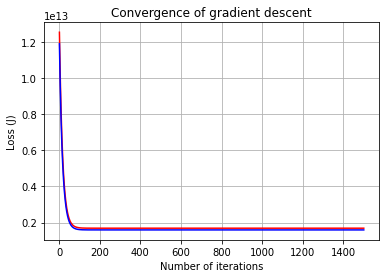

In [10]:
plt.plot(range(1,iterations + 1), loss_train, color = 'red')
plt.plot(range(1,iterations + 1), loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Problem 1b

In [11]:
varlist1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X = df[varlist1b]
Y = df.iloc[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 100)

#concat 1's vector
train_in = pd.concat([pd.Series(1, index=X_train.index, name='00'), X_train], axis=1)
test_in = pd.concat([pd.Series(1,index=X_test.index, name='00'), X_test], axis =1)

theta_train = np.array([0]*len(train_in.columns))
theta_test = np.array([0]*len(test_in.columns))

train_examples = len(Y_train)
test_examples = len(Y_test)

In [12]:
loss_train = compute_loss(train_in,Y_train,theta_train,train_examples)
loss_test = compute_loss(test_in,Y_test,theta_test,test_examples)

print("Loss for Training Set: ", loss_train)
print("Loss for Testing Set: ", loss_test)

Loss for Training Set:  13238799902211.697
Loss for Testing Set:  12579382214449.541


In [13]:
#Train
theta_train = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.000000001;

theta_train, loss_train = gradient_descent(train_in, Y_train, theta_train, train_examples, alpha, iterations)
print('Final value of theta =', theta_train)

#Test
theta_test = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.000000001;

theta_test, loss_test = gradient_descent(test_in, Y_test, theta_test, test_examples, alpha, iterations)
print('Final value of theta =', theta_test)

Final value of theta = 00                   0.683990
area               861.912304
bedrooms             2.469062
bathrooms            1.383418
stories              2.098397
mainroad             0.593447
guestroom            0.237475
basement             0.376361
hotwaterheating      0.109144
airconditioning      0.509626
parking              0.544771
prefarea             0.258800
dtype: float64
Final value of theta = 00                   0.661874
area               831.427092
bedrooms             2.489104
bathrooms            1.149904
stories              1.854308
mainroad             0.618065
guestroom            0.297292
basement             0.620098
hotwaterheating      0.008982
airconditioning      0.594086
parking              0.647919
prefarea             0.372792
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

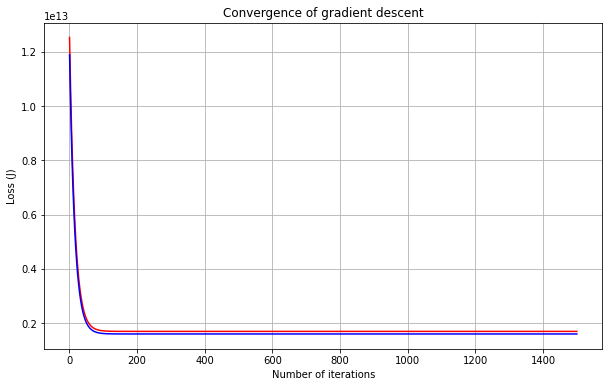

In [14]:
plt.plot(range(1,iterations + 1), loss_train, color = 'red')
plt.plot(range(1,iterations + 1), loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Problem 2a

In [15]:
file_path = '/content/drive/MyDrive/Machine Learning/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))

normal_df = df
standard_df = df

In [16]:
normal_df = clean_data(normal_df)
normal_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [17]:
standard_df = clean_data(standard_df)
standard_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [18]:
norm_col = normal_df.columns
normalize = preprocessing.Normalizer().fit(normal_df)
normal_df[norm_col] = normalize.transform(normal_df[norm_col])

In [19]:
stand_col = standard_df.columns
standardize = preprocessing.StandardScaler().fit(standard_df)
standard_df[stand_col] = standardize.transform(standard_df[stand_col])

In [20]:
varlist2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#Normal
norm_in = normal_df[varlist2a]
norm_out = normal_df.iloc[:,0]
X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(norm_in, norm_out, test_size = .2, random_state = 100)

norm_train_in = pd.concat([pd.Series(1, index=X_norm_train.index, name='00'), X_norm_train], axis=1)
norm_test_in = pd.concat([pd.Series(1,index=X_norm_test.index, name='00'), X_norm_test], axis =1)

norm_theta_train = np.array([0]*len(norm_train_in.columns))
norm_theta_test = np.array([0]*len(norm_test_in.columns))

norm_train_examples = len(Y_norm_train)
norm_test_examples = len(Y_norm_test)

#Standard
stand_in = standard_df[varlist2a]
stand_out = standard_df.iloc[:,0]
X_stand_train, X_stand_test, Y_stand_train, Y_stand_test = train_test_split(stand_in, stand_out, test_size = .2, random_state = 100)

stand_train_in = pd.concat([pd.Series(1, index=X_stand_train.index, name='00'), X_norm_train], axis=1)
stand_test_in = pd.concat([pd.Series(1,index=X_stand_test.index, name='00'), X_norm_test], axis =1)

stand_theta_train = np.array([0]*len(stand_train_in.columns))
stand_theta_test = np.array([0]*len(stand_test_in.columns))

stand_train_examples = len(Y_stand_train)
stand_test_examples = len(Y_stand_test)

In [21]:
#Normal
norm_loss_train = compute_loss(norm_train_in, Y_norm_train, norm_theta_train, norm_train_examples)
norm_loss_test = compute_loss(norm_test_in, Y_norm_test, norm_theta_test, norm_test_examples)

print("Normalized loss of the Training Set: ",norm_loss_train)
print("Normalized loss of the Testing Set: ",norm_loss_test)


#Standard
stand_loss_train = compute_loss(stand_train_in, Y_stand_train, stand_theta_train, stand_train_examples)
stand_loss_test = compute_loss(stand_test_in, Y_stand_test, stand_theta_test, stand_test_examples)

print("Standardized loss of the Training Set: ",stand_loss_train)
print("Standardized loss of the Testing Set: ",stand_loss_test)

Normalized loss of the Training Set:  0.517639469200009
Normalized loss of the Testing Set:  0.429442123199964
Standardized loss of the Training Set:  0.517639469200009
Standardized loss of the Testing Set:  0.429442123199964


In [22]:
###Training
#Normal
norm_theta_train = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

norm_theta_train, norm_loss_train = gradient_descent(norm_train_in, Y_norm_train, norm_theta_train, norm_train_examples, alpha, iterations)
print('Final value of theta =', norm_theta_train)

#Standard
stand_theta_train = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

stand_theta_train, stand_loss_train = gradient_descent(stand_train_in, Y_stand_train, stand_theta_train, stand_train_examples, alpha, iterations)
print('Final value of theta =', stand_theta_train)


###Testing
#Normal
norm_theta_test = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

norm_theta_test, norm_loss_test = gradient_descent(norm_test_in, Y_norm_test, norm_theta_test, norm_test_examples, alpha, iterations)
print('Final value of theta =', norm_theta_test)

#Standard
stand_theta_test = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

stand_theta_test, stand_loss_test = gradient_descent(stand_test_in, Y_stand_test, stand_theta_test,stand_test_examples, alpha, iterations)
print('Final value of theta =', stand_theta_test)

Final value of theta = 00          -0.004934
area        -0.983220
bedrooms     0.041709
bathrooms   -0.001071
stories     -0.021340
parking      0.013067
dtype: float64
Final value of theta = 00          -0.004934
area        -0.983220
bedrooms     0.041709
bathrooms   -0.001071
stories     -0.021340
parking      0.013067
dtype: float64
Final value of theta = 00           0.017838
area        -0.938169
bedrooms     0.008434
bathrooms    0.017988
stories      0.011698
parking      0.002388
dtype: float64
Final value of theta = 00           0.017838
area        -0.938169
bedrooms     0.008434
bathrooms    0.017988
stories      0.011698
parking      0.002388
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

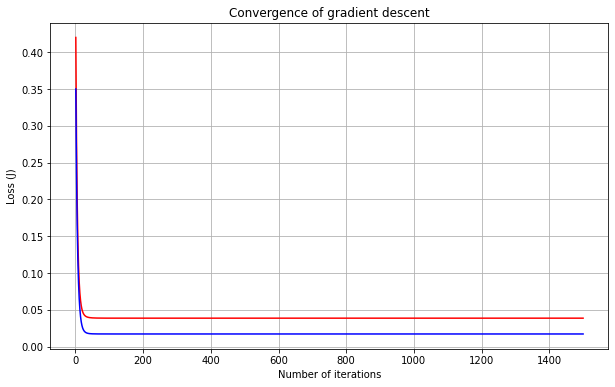

In [23]:
plt.plot(range(1,iterations + 1), norm_loss_train, color = 'red')
plt.plot(range(1,iterations + 1), norm_loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

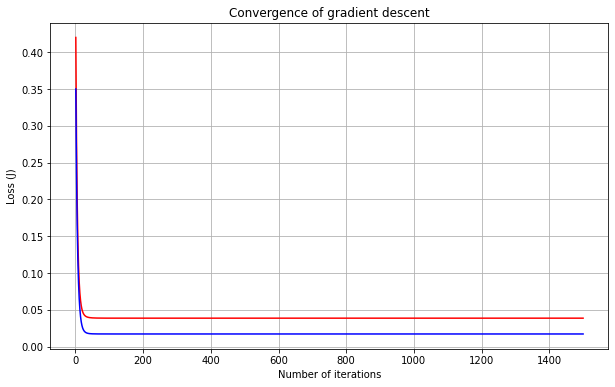

In [24]:
plt.plot(range(1,iterations + 1), stand_loss_train, color = 'red')
plt.plot(range(1,iterations + 1), stand_loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Problem 2b

In [25]:
varlist2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

#Normal
norm_in = normal_df[varlist2b]
norm_out = normal_df.iloc[:,0]
X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(norm_in, norm_out, test_size = .2, random_state = 100)

norm_train_in = pd.concat([pd.Series(1, index=X_norm_train.index, name='00'), X_norm_train], axis=1)
norm_test_in = pd.concat([pd.Series(1,index=X_norm_test.index, name='00'), X_norm_test], axis =1)

norm_theta_train = np.array([0]*len(norm_train_in.columns))
norm_theta_test = np.array([0]*len(norm_test_in.columns))

norm_train_examples = len(Y_norm_train)
norm_test_examples = len(Y_norm_test)

#Standard
stand_in = standard_df[varlist2b]
stand_out = standard_df.iloc[:,0]
X_stand_train, X_stand_test, Y_stand_train, Y_stand_test = train_test_split(stand_in, stand_out, test_size = .2, random_state = 100)

stand_train_in = pd.concat([pd.Series(1, index=X_stand_train.index, name='00'), X_norm_train], axis=1)
stand_test_in = pd.concat([pd.Series(1,index=X_stand_test.index, name='00'), X_norm_test], axis =1)

stand_theta_train = np.array([0]*len(stand_train_in.columns))
stand_theta_test = np.array([0]*len(stand_test_in.columns))

stand_train_examples = len(Y_stand_train)
stand_test_examples = len(Y_stand_test)

In [26]:
#Normal
norm_loss_train = compute_loss(norm_train_in, Y_norm_train, norm_theta_train, norm_train_examples)
norm_loss_test = compute_loss(norm_test_in, Y_norm_test, norm_theta_test, norm_test_examples)

print("Normalized loss of the Training Set: ",norm_loss_train)
print("Normalized loss of the Testing Set: ",norm_loss_test)

#Standard
stand_loss_train = compute_loss(stand_train_in, Y_stand_train, stand_theta_train, stand_train_examples)
stand_loss_test = compute_loss(stand_test_in, Y_stand_test, stand_theta_test, stand_test_examples)

print("Standardized loss of the Training Set: ",stand_loss_train)
print("Standardized loss of the Testing Set: ",stand_loss_test)

Normalized loss of the Training Set:  0.517639469200009
Normalized loss of the Testing Set:  0.429442123199964
Standardized loss of the Training Set:  0.517639469200009
Standardized loss of the Testing Set:  0.429442123199964


In [27]:
###Training
#Normal
norm_theta_train = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

norm_theta_train, norm_loss_train = gradient_descent(norm_train_in, Y_norm_train, norm_theta_train, norm_train_examples, alpha, iterations)
print('Final value of theta =', norm_theta_train)

#Standard
stand_theta_train = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

stand_theta_train, stand_loss_train = gradient_descent(stand_train_in, Y_stand_train, stand_theta_train, stand_train_examples, alpha, iterations)
print('Final value of theta =', stand_theta_train)


###Testing
#Normal
norm_theta_test = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

norm_theta_test, norm_loss_test = gradient_descent(norm_test_in, Y_norm_test, norm_theta_test, norm_test_examples, alpha, iterations)
print('Final value of theta =', norm_theta_test)

#Standard
stand_theta_test = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

stand_theta_test, stand_loss_test = gradient_descent(stand_test_in, Y_stand_test, stand_theta_test,stand_test_examples, alpha, iterations)
print('Final value of theta =', stand_theta_test)

Final value of theta = 00                -0.004267
area              -0.989789
bedrooms           0.042948
bathrooms         -0.004991
stories           -0.023282
mainroad           0.017213
guestroom          0.019785
basement          -0.003847
hotwaterheating   -0.004422
airconditioning    0.001209
parking            0.013547
prefarea          -0.025420
dtype: float64
Final value of theta = 00                -0.004267
area              -0.989789
bedrooms           0.042948
bathrooms         -0.004991
stories           -0.023282
mainroad           0.017213
guestroom          0.019785
basement          -0.003847
hotwaterheating   -0.004422
airconditioning    0.001209
parking            0.013547
prefarea          -0.025420
dtype: float64
Final value of theta = 00                 0.008421
area              -0.939048
bedrooms           0.018203
bathrooms          0.035093
stories            0.007393
mainroad           0.004119
guestroom          0.025482
basement          -0.019556
hotwa

Text(0.5, 1.0, 'Convergence of gradient descent')

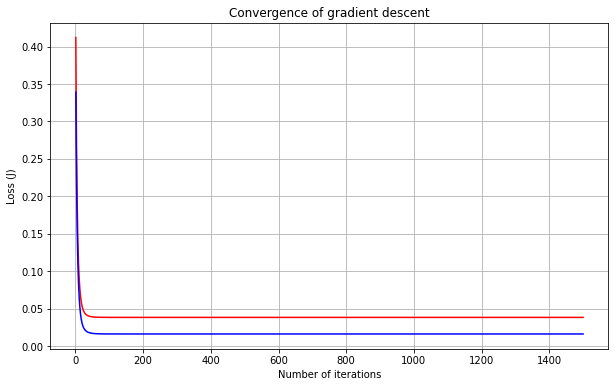

In [28]:
plt.plot(range(1,iterations + 1), norm_loss_train, color = 'red')
plt.plot(range(1,iterations + 1), norm_loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

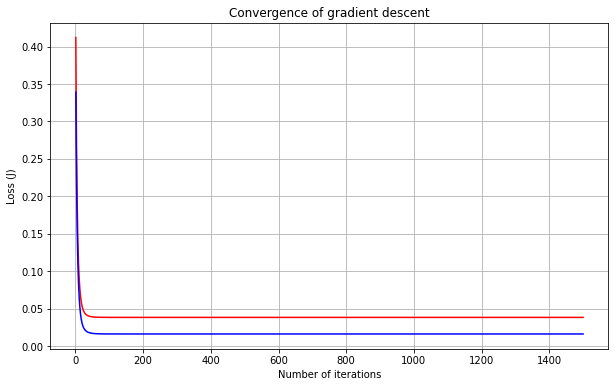

In [29]:
plt.plot(range(1,iterations + 1), stand_loss_train, color = 'red')
plt.plot(range(1,iterations + 1), stand_loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Problem 3a

In [30]:
file_path = '/content/drive/MyDrive/Machine Learning/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))

normal_df = df
standard_df = df

In [31]:
normal_df = clean_data(normal_df)
normal_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [32]:
standard_df = clean_data(standard_df)
standard_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [33]:
norm_col = normal_df.columns
normalize = preprocessing.Normalizer().fit(normal_df)
normal_df[norm_col] = normalize.transform(normal_df[norm_col])

In [34]:
stand_col = standard_df.columns
standardize = preprocessing.StandardScaler().fit(standard_df)
standard_df[stand_col] = standardize.transform(standard_df[stand_col])

In [35]:
lambdaa = 0.01
def gradient_descent(X, Y, theta, examples, alpha, iterations):
  loss_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha/examples) * X.transpose().dot(errors);
    if i > 0:
      sum_delta += ((alpha*lambdaa)/examples) * theta
    theta = theta - sum_delta;
    loss_history[i] = compute_loss(X, Y, theta, examples)
  return theta, loss_history

In [36]:
varlist3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#Normal
norm_in = normal_df[varlist3a]
norm_out = normal_df.iloc[:,0]
X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(norm_in, norm_out, test_size = .2, random_state = 100)

norm_train_in = pd.concat([pd.Series(1, index=X_norm_train.index, name='00'), X_norm_train], axis=1)
norm_test_in = pd.concat([pd.Series(1,index=X_norm_test.index, name='00'), X_norm_test], axis =1)

norm_theta_train = np.array([0]*len(norm_train_in.columns))
norm_theta_test = np.array([0]*len(norm_test_in.columns))

norm_train_examples = len(Y_norm_train)
norm_test_examples = len(Y_norm_test)

#Standard
stand_in = standard_df[varlist3a]
stand_out = standard_df.iloc[:,0]
X_stand_train, X_stand_test, Y_stand_train, Y_stand_test = train_test_split(stand_in, stand_out, test_size = .2, random_state = 100)

stand_train_in = pd.concat([pd.Series(1, index=X_stand_train.index, name='00'), X_norm_train], axis=1)
stand_test_in = pd.concat([pd.Series(1,index=X_stand_test.index, name='00'), X_norm_test], axis =1)

stand_theta_train = np.array([0]*len(stand_train_in.columns))
stand_theta_test = np.array([0]*len(stand_test_in.columns))

stand_train_examples = len(Y_stand_train)
stand_test_examples = len(Y_stand_test)

In [37]:
#Normal
norm_loss_train = compute_loss(norm_train_in, Y_norm_train, norm_theta_train, norm_train_examples)
norm_loss_test = compute_loss(norm_test_in, Y_norm_test, norm_theta_test, norm_test_examples)

print("Normalized loss of the Training Set: ",norm_loss_train)
print("Normalized loss of the Testing Set: ",norm_loss_test)


#Standard
stand_loss_train = compute_loss(stand_train_in, Y_stand_train, stand_theta_train, stand_train_examples)
stand_loss_test = compute_loss(stand_test_in, Y_stand_test, stand_theta_test, stand_test_examples)

print("Standardized loss of the Training Set: ",stand_loss_train)
print("Standardized loss of the Testing Set: ",stand_loss_test)

Normalized loss of the Training Set:  0.517639469200009
Normalized loss of the Testing Set:  0.429442123199964
Standardized loss of the Training Set:  0.517639469200009
Standardized loss of the Testing Set:  0.429442123199964


In [38]:
###Training
#Normal
norm_theta_train = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

norm_theta_train, norm_loss_train = gradient_descent(norm_train_in, Y_norm_train, norm_theta_train, norm_train_examples, alpha, iterations)
print('Final value of theta =', norm_theta_train)

#Standard
stand_theta_train = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

stand_theta_train, stand_loss_train = gradient_descent(stand_train_in, Y_stand_train, stand_theta_train, stand_train_examples, alpha, iterations)
print('Final value of theta =', stand_theta_train)


###Testing
#Normal
norm_theta_test = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

norm_theta_test, norm_loss_test = gradient_descent(norm_test_in, Y_norm_test, norm_theta_test, norm_test_examples, alpha, iterations)
print('Final value of theta =', norm_theta_test)

#Standard
stand_theta_test = [0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

stand_theta_test, stand_loss_test = gradient_descent(stand_test_in, Y_stand_test, stand_theta_test,stand_test_examples, alpha, iterations)
print('Final value of theta =', stand_theta_test)

Final value of theta = 00          -0.004934
area        -0.983195
bedrooms     0.041698
bathrooms   -0.001071
stories     -0.021334
parking      0.013063
dtype: float64
Final value of theta = 00          -0.004934
area        -0.983195
bedrooms     0.041698
bathrooms   -0.001071
stories     -0.021334
parking      0.013063
dtype: float64
Final value of theta = 00           0.017832
area        -0.938070
bedrooms     0.008411
bathrooms    0.017979
stories      0.011716
parking      0.002380
dtype: float64
Final value of theta = 00           0.017832
area        -0.938070
bedrooms     0.008411
bathrooms    0.017979
stories      0.011716
parking      0.002380
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

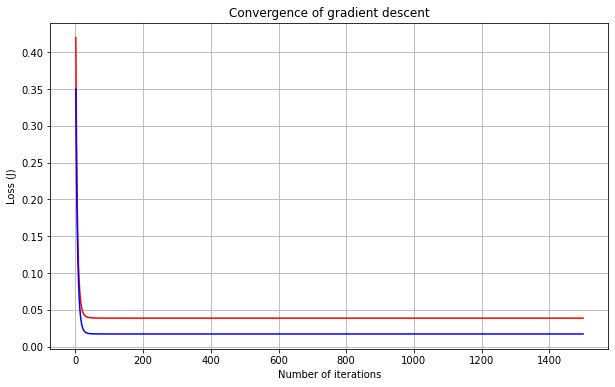

In [39]:
plt.plot(range(1,iterations + 1), norm_loss_train, color = 'red')
plt.plot(range(1,iterations + 1), norm_loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

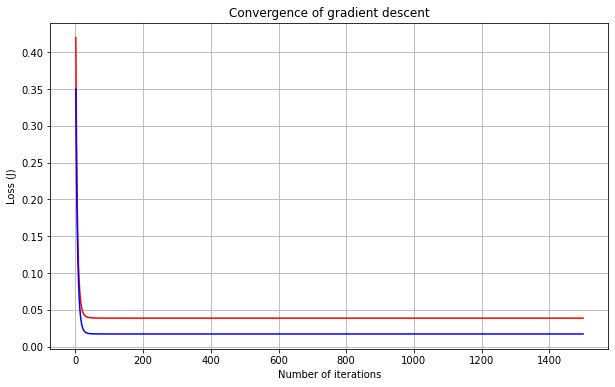

In [40]:
plt.plot(range(1,iterations + 1), stand_loss_train, color = 'red')
plt.plot(range(1,iterations + 1), stand_loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Problem 3b

In [41]:
varlist3b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

#Normal
norm_in = normal_df[varlist3b]
norm_out = normal_df.iloc[:,0]
X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(norm_in, norm_out, test_size = .2, random_state = 100)

norm_train_in = pd.concat([pd.Series(1, index=X_norm_train.index, name='00'), X_norm_train], axis=1)
norm_test_in = pd.concat([pd.Series(1,index=X_norm_test.index, name='00'), X_norm_test], axis =1)

norm_theta_train = np.array([0]*len(norm_train_in.columns))
norm_theta_test = np.array([0]*len(norm_test_in.columns))

norm_train_examples = len(Y_norm_train)
norm_test_examples = len(Y_norm_test)

#Standard
stand_in = standard_df[varlist3b]
stand_out = standard_df.iloc[:,0]
X_stand_train, X_stand_test, Y_stand_train, Y_stand_test = train_test_split(stand_in, stand_out, test_size = .2, random_state = 100)

stand_train_in = pd.concat([pd.Series(1, index=X_stand_train.index, name='00'), X_norm_train], axis=1)
stand_test_in = pd.concat([pd.Series(1,index=X_stand_test.index, name='00'), X_norm_test], axis =1)

stand_theta_train = np.array([0]*len(stand_train_in.columns))
stand_theta_test = np.array([0]*len(stand_test_in.columns))

stand_train_examples = len(Y_stand_train)
stand_test_examples = len(Y_stand_test)

In [42]:
#Normal
norm_loss_train = compute_loss(norm_train_in, Y_norm_train, norm_theta_train, norm_train_examples)
norm_loss_test = compute_loss(norm_test_in, Y_norm_test, norm_theta_test, norm_test_examples)

print("Normalized loss of the Training Set: ",norm_loss_train)
print("Normalized loss of the Testing Set: ",norm_loss_test)


#Standard
stand_loss_train = compute_loss(stand_train_in, Y_stand_train, stand_theta_train, stand_train_examples)
stand_loss_test = compute_loss(stand_test_in, Y_stand_test, stand_theta_test, stand_test_examples)

print("Standardized loss of the Training Set: ",stand_loss_train)
print("Standardized loss of the Testing Set: ",stand_loss_test)

Normalized loss of the Training Set:  0.517639469200009
Normalized loss of the Testing Set:  0.429442123199964
Standardized loss of the Training Set:  0.517639469200009
Standardized loss of the Testing Set:  0.429442123199964


In [43]:
###Training
#Normal
norm_theta_train = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

norm_theta_train, norm_loss_train = gradient_descent(norm_train_in, Y_norm_train, norm_theta_train, norm_train_examples, alpha, iterations)
print('Final value of theta =', norm_theta_train)

#Standard
stand_theta_train = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

stand_theta_train, stand_loss_train = gradient_descent(stand_train_in, Y_stand_train, stand_theta_train, stand_train_examples, alpha, iterations)
print('Final value of theta =', stand_theta_train)


###Testing
#Normal
norm_theta_test = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

norm_theta_test, norm_loss_test = gradient_descent(norm_test_in, Y_norm_test, norm_theta_test, norm_test_examples, alpha, iterations)
print('Final value of theta =', norm_theta_test)

#Standard
stand_theta_test = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.1;

stand_theta_test, stand_loss_test = gradient_descent(stand_test_in, Y_stand_test, stand_theta_test,stand_test_examples, alpha, iterations)
print('Final value of theta =', stand_theta_test)

Final value of theta = 00                -0.004267
area              -0.989761
bedrooms           0.042936
bathrooms         -0.004990
stories           -0.023275
mainroad           0.017205
guestroom          0.019782
basement          -0.003842
hotwaterheating   -0.004420
airconditioning    0.001209
parking            0.013543
prefarea          -0.025418
dtype: float64
Final value of theta = 00                -0.004267
area              -0.989761
bedrooms           0.042936
bathrooms         -0.004990
stories           -0.023275
mainroad           0.017205
guestroom          0.019782
basement          -0.003842
hotwaterheating   -0.004420
airconditioning    0.001209
parking            0.013543
prefarea          -0.025418
dtype: float64
Final value of theta = 00                 0.008418
area              -0.938931
bedrooms           0.018171
bathrooms          0.035080
stories            0.007429
mainroad           0.004103
guestroom          0.025479
basement          -0.019520
hotwa

Text(0.5, 1.0, 'Convergence of gradient descent')

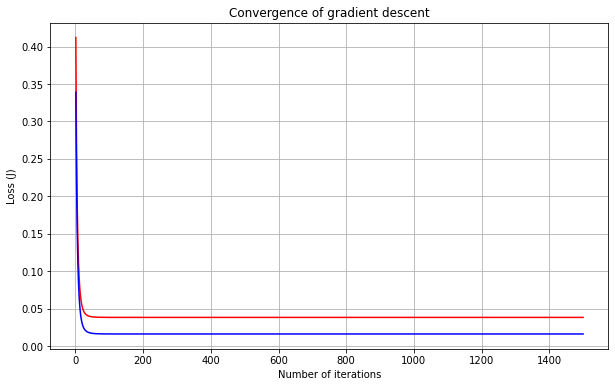

In [44]:
plt.plot(range(1,iterations + 1), norm_loss_train, color = 'red')
plt.plot(range(1,iterations + 1), norm_loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

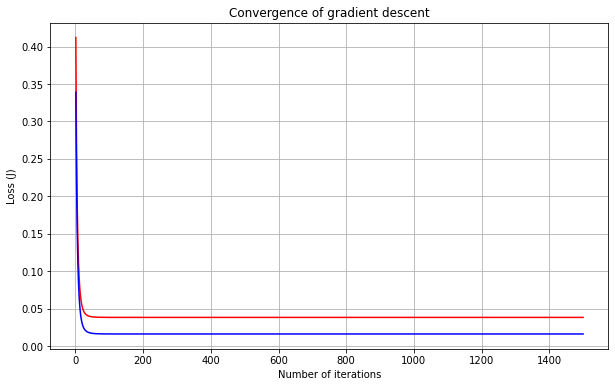

In [45]:
plt.plot(range(1,iterations + 1), stand_loss_train, color = 'red')
plt.plot(range(1,iterations + 1), stand_loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')